# Company data visualization based on data from yahoo finance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data initialisation
def init_data(file_name, comp_name):
    data = pd.read_csv('Data/'+file_name)
    data.drop(data.columns[data.columns.str.contains('unnamed',case = False)], axis=1, inplace=True)
    data.set_index('formatted_date', inplace=True)
    data.index = pd.to_datetime(data.index)
    data.drop(['date'], axis=1, inplace=True)
    data.name = comp_name
    return data

In [3]:
def check_data(data):
    print('== header ==')
    print(data.head())
    print('== info ==')
    print(data.info())
    print('== shape ==')
    print(data.shape)
    print('== describe ==')
    print(data.describe())
    print('== qty of null and na ==')
    print(data.isnull().sum())
    print(data.isna().sum())
    print('== show rows with nan ==')
    print(data[data.isna().any(axis=1)])
    print('== check the inf values ==')
    print(np.isinf(data).any())
    print('== check the 0s values ==')
    print((data == 0).sum(axis=1).any())

In [4]:
comp_1d_data = init_data('Amazon_1D.csv', 'Amazon')
comp_1w_data = init_data('Amazon_1W.csv', 'Amazon')
comp_1m_data = init_data('Amazon_1M.csv', 'Amazon')

In [5]:
comp_1d_data
# comp_1w_data
# comp_1m_data

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
1997-05-15,2.500000,1.927083,2.437500,1.958333,72156000,1.958333
1997-05-16,1.979167,1.708333,1.968750,1.729167,14700000,1.729167
1997-05-19,1.770833,1.625000,1.760417,1.708333,6106800,1.708333
1997-05-20,1.750000,1.635417,1.729167,1.635417,5467200,1.635417
1997-05-21,1.645833,1.375000,1.635417,1.427083,18853200,1.427083
...,...,...,...,...,...,...
2021-12-23,3439.500000,3403.000000,3408.560059,3421.370117,1837500,3421.370117
2021-12-27,3458.860107,3384.310059,3420.739990,3393.389893,2934400,3393.389893
2021-12-28,3443.520020,3382.709961,3403.649902,3413.219971,2731900,3413.219971


In [6]:
check_data(comp_1d_data)

== header ==
                    high       low      open     close    volume  adjclose
formatted_date                                                            
1997-05-15      2.500000  1.927083  2.437500  1.958333  72156000  1.958333
1997-05-16      1.979167  1.708333  1.968750  1.729167  14700000  1.729167
1997-05-19      1.770833  1.625000  1.760417  1.708333   6106800  1.708333
1997-05-20      1.750000  1.635417  1.729167  1.635417   5467200  1.635417
1997-05-21      1.645833  1.375000  1.635417  1.427083  18853200  1.427083
== info ==
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6199 entries, 1997-05-15 to 2021-12-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high      6199 non-null   float64
 1   low       6199 non-null   float64
 2   open      6199 non-null   float64
 3   close     6199 non-null   float64
 4   volume    6199 non-null   int64  
 5   adjclose  6199 non-null   float64
dtypes: float64

In [ ]:
check_data(comp_1w_data)

In [ ]:
check_data(comp_1m_data)

In [7]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="darkgrid", rc=custom_params)

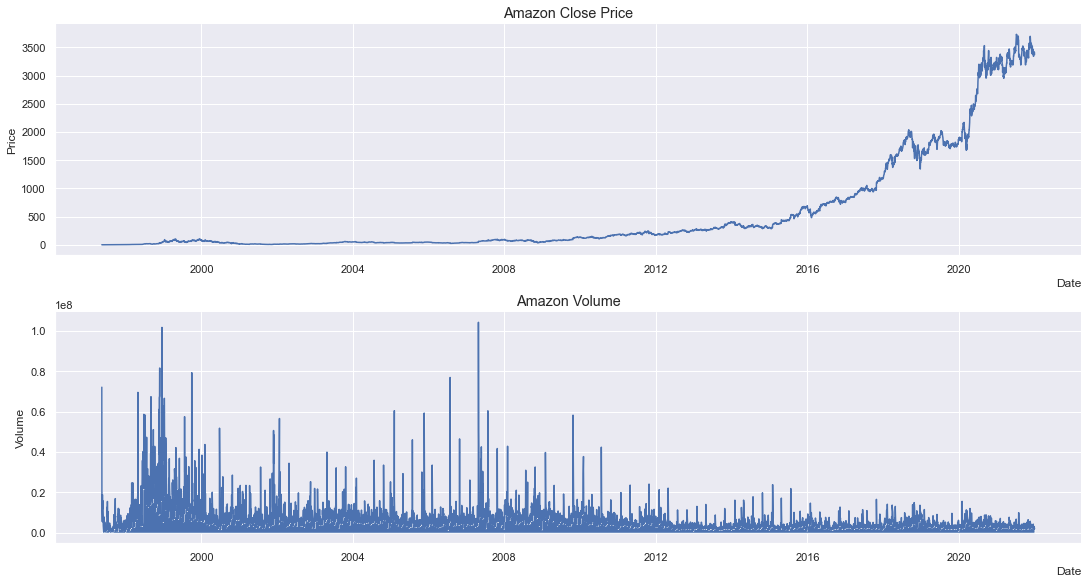

In [8]:
def show_price_and_volume_chart(df):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 8), constrained_layout=True)
    show_price_chart(df, axs, 0)
    show_volum_chart(df, axs, 1)
    
def show_price_chart(df, axs, place):
    axs.flat[place].set_title(f'{df.name} Close Price', fontsize='large')
    sns.lineplot(data=df['close'], ax=axs.flat[place])
    axs.flat[place].set_ylabel('Price')
    axs.flat[place].set_xlabel('Date', loc='right')

def show_volum_chart(df, axs, place):
    axs.flat[place].set_title(f'{df.name} Volume', fontsize='large')
    sns.lineplot(data=df['volume'], ax=axs.flat[place])
    axs.flat[place].fill_between(df.index.values, df['volume'].values)
    axs.flat[place].set_ylabel('Volume')
    axs.flat[place].set_xlabel('Date', loc='right')

show_price_and_volume_chart(comp_1d_data)

In [9]:
def get_price_change(df):
    df['close_pc'] = 100*(df.close - df.open)/df.open # pc - price change
    return df

comp_1d_data = get_price_change(comp_1d_data)
comp_1w_data = get_price_change(comp_1w_data)
comp_1m_data = get_price_change(comp_1m_data)

In [10]:
comp_1d_data
# comp_1w_data
# comp_1m_data

,high,low,open,close,volume,adjclose,close_pc
formatted_date,,,,,,,
1997-05-15,2.500000,1.927083,2.437500,1.958333,72156000,1.958333,-19.658133
1997-05-16,1.979167,1.708333,1.968750,1.729167,14700000,1.729167,-12.169296
1997-05-19,1.770833,1.625000,1.760417,1.708333,6106800,1.708333,-2.958615
1997-05-20,1.750000,1.635417,1.729167,1.635417,5467200,1.635417,-5.421686
1997-05-21,1.645833,1.375000,1.635417,1.427083,18853200,1.427083,-12.738890
...,...,...,...,...,...,...,...
2021-12-23,3439.500000,3403.000000,3408.560059,3421.370117,1837500,3421.370117,0.375820
2021-12-27,3458.860107,3384.310059,3420.739990,3393.389893,2934400,3393.389893,-0.799537
2021-12-28,3443.520020,3382.709961,3403.649902,3413.219971,2731900,3413.219971,0.281171


In [11]:
def get_all_time_return(df):
    ''' The all time return (fisrt open -> last close) [%] '''
    atr = 100*(df.iloc[-1]['close'] - df.iloc[0]['open'])/df.iloc[0]['open']
    return atr

atr = get_all_time_return(comp_1d_data)
atr

138274.96995192306

In [12]:
def get_mean_price_change_per_day(df):
    df['mm_dd'] = df.index.map(lambda x: str(x)[5:10])
    pc_per_day = df.groupby(['mm_dd']).mean()
    return pc_per_day

price_change_per_day = get_mean_price_change_per_day(comp_1d_data)

In [13]:
price_change_per_day

,high,low,open,close,volume,adjclose,close_pc
mm_dd,,,,,,,
01-02,451.565384,438.037072,440.773262,449.371027,5.735500e+06,449.371027,0.080124
01-03,424.189215,415.816214,418.534690,419.791091,7.672512e+06,419.791091,3.254526
01-04,509.894457,492.690596,504.111151,500.427857,1.004044e+07,500.427857,-0.784489
01-05,417.134847,407.290643,410.191569,414.719560,1.127128e+07,414.719560,0.530190
01-06,477.569996,465.636857,468.831641,471.702997,8.385259e+06,471.702997,0.215840
...,...,...,...,...,...,...,...
12-27,598.410453,583.403096,592.337060,590.358822,7.580529e+06,590.358822,-0.419107
12-28,670.098470,652.675226,657.761336,663.594093,7.958361e+06,663.594093,0.603648
12-29,591.673074,580.074234,586.738563,585.423773,6.533128e+06,585.423773,-0.637603


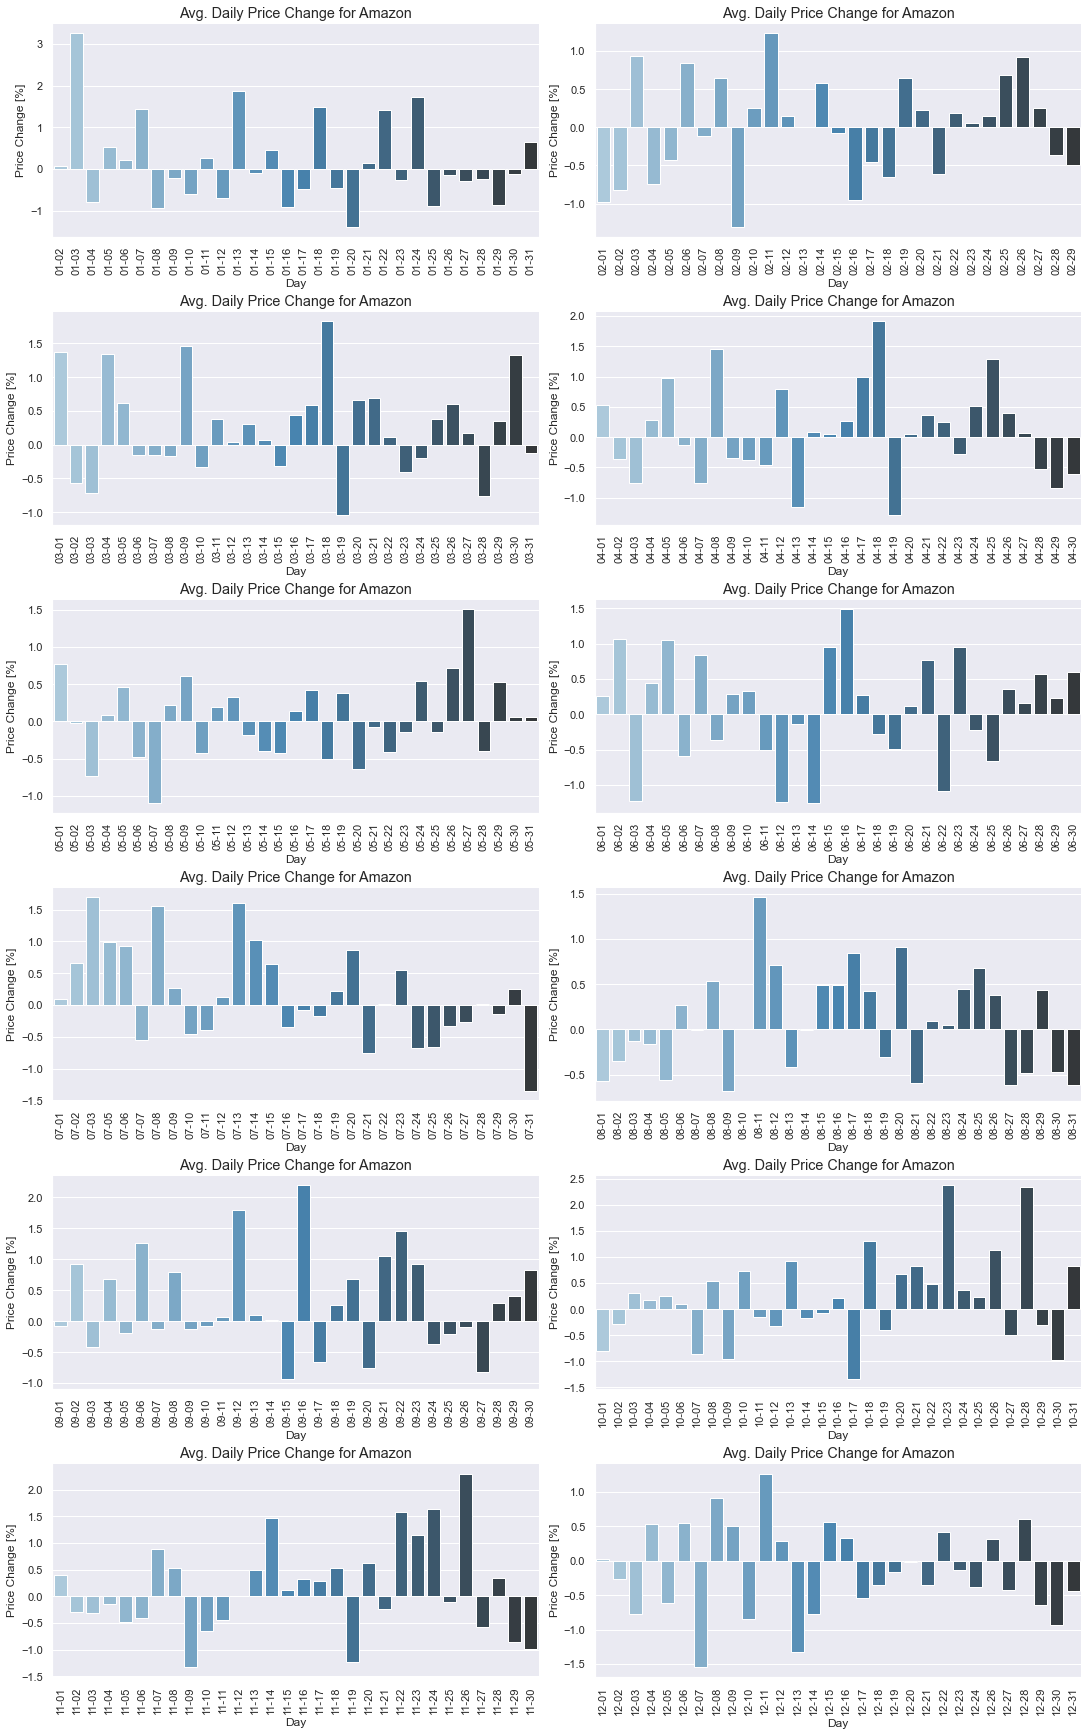

In [14]:
def show_avg_day_price_changes(df):
    fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 24), constrained_layout=True)
    for i in range(12):
        month = '0'+str(i+1) if i < 9 else str(i+1)
        table = df[df.index.str.split('-').str[0] == month]
        sns.barplot(ax=axs.flat[i], x=table.index, y=table['close_pc'], palette="Blues_d")
        axs.flat[i].set_title(f'Avg. Daily Price Change for {comp_1d_data.name}', fontsize='large')
        axs.flat[i].set_ylabel('Price Change [%]')
        axs.flat[i].set_xlabel('Day')
        axs.flat[i].set_xticklabels(labels=table.index,rotation=90)

show_avg_day_price_changes(price_change_per_day)

In [15]:
def create_1y_price_change_df(df):
    ''' Create the 1y close change table.
    Please take into account the below takes first opne of the year from the dataset not in general.
    Thus, if the year in df is e.g. 25.06.2000 that will be the first open (similarly for the close price) '''
    grouped_per_year = get_grouped_per_year(df)
    columns = ['Year', 'Price Change']
    pc_1y_data = pd.DataFrame(columns=columns)
    for year_data in grouped_per_year:
        date = str(year_data[0])[:4]
        first_open_of_year = year_data[1].iloc[0]['open']
        last_close_of_year = year_data[1].iloc[-1]['close']
        year_diff = 100*(last_close_of_year - first_open_of_year)/first_open_of_year
        pc_1y_data = pc_1y_data.append(
                pd.Series(
                    [
                        date,
                        year_diff
                    ],
                    index=columns
                ),
                ignore_index=True
            )
    pc_1y_data = pc_1y_data.set_index('Year')
    pc_1y_data.name = df.name # needs to be done after the above operations
    return pc_1y_data

def get_grouped_per_year(df):
    return df.groupby(pd.Grouper(freq='Y'))

In [16]:
price_change_1y_data = create_1y_price_change_df(comp_1d_data)

In [17]:
price_change_1y_data

,Price Change
Year,
1997,105.982893
1998,970.833359
1999,39.385851
2000,-80.904908
2001,-31.573124
2002,72.827071
2003,174.205302
2004,-16.053824
2005,4.894329


In [18]:
def show_price_change_chart(df, range=None):
    ''' Show chart for yearly price change (open - close).
        The range representation is [start_ix:end_ix] '''
    if df.index.name == 'Year':
        chart_title = f'Annual Returns for {df.name}'
    elif df.index.name == 'Month':
        chart_title = f'Avg. Monthly Returns for {df.name}'
    else:
        chart_title = f'Ups, there is no title for {df.index.name} index'
    if not range:
        plt.figure(figsize=(15, 8))
        plt.title(chart_title, fontsize='large')
        sns.barplot(x=df.index, y=df['Price Change'], palette="Blues_d")
        plt.ylabel('Returns [%]')
        plt.xlabel(df.index.name, loc='right')
        plt.xticks(rotation=45)
        addlabels(df['Price Change'].values)
    else:
        range_start = range[0]
        range_end = range[-1]
        plt.figure(figsize=(15, 8))
        plt.title(f'{chart_title} between {df.index[range_start]} and {df.index[range_end-1]}', fontsize='large')
        sns.barplot(x=df.index[range_start:range_end], y=df['Price Change'][range_start:range_end], palette="Blues_d")
        plt.ylabel('Returns [%]')
        plt.xlabel(df.index.name, loc='right')
        plt.xticks(rotation=45)
        addlabels(df['Price Change'][range_start:range_end].values)

In [19]:
def addlabels(y):
    for index, value in enumerate(y):
        label = str(round(value, 2))
        if value < 0:
            plt.text(index, 0,
                     label, ha='center')
        else:
            plt.text(index, value,
                     label, ha='center')

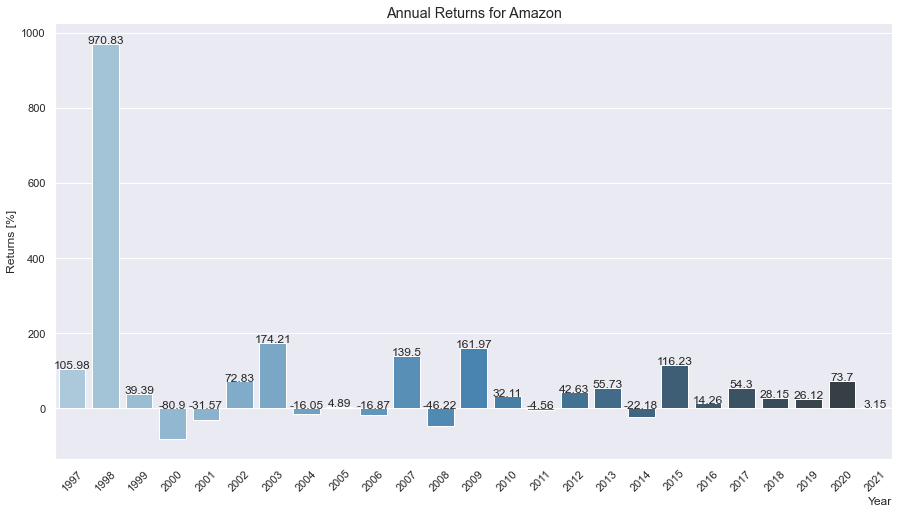

In [20]:
show_price_change_chart(price_change_1y_data)

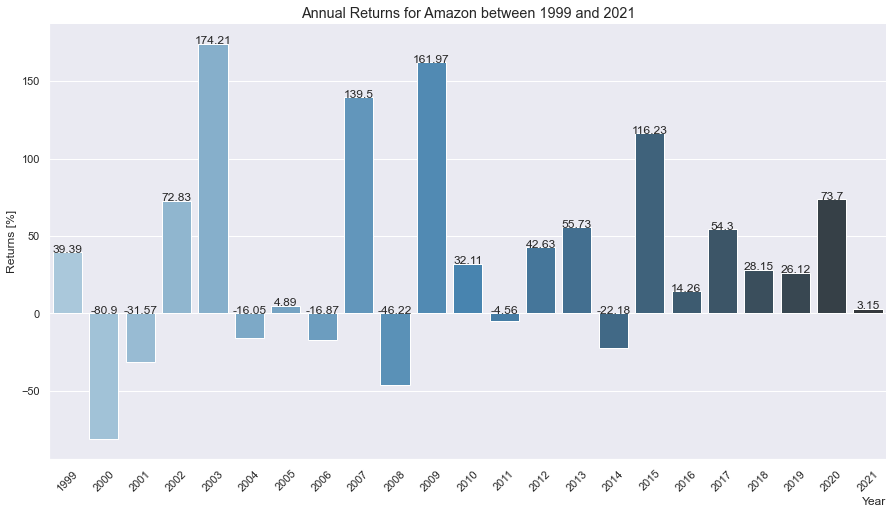

In [21]:
# for this particular company let's show data from 1999 until 2021
show_price_change_chart(price_change_1y_data, [2, price_change_1y_data.shape[0]])

In [22]:
comp_1m_data

,high,low,open,close,volume,adjclose,close_pc
formatted_date,,,,,,,
1997-06-01,1.708333,1.375000,1.510417,1.541667,53163600,1.541667,2.068965
1997-07-01,2.572917,1.510417,1.541667,2.395833,108614400,2.395833,55.405353
1997-08-01,2.416667,1.937500,2.343750,2.338542,31906800,2.338542,-0.222209
1997-09-01,4.812500,2.312500,2.343750,4.338542,107862000,4.338542,85.111125
1997-10-01,5.500000,3.520833,4.437500,5.083333,105187200,5.083333,14.553983
...,...,...,...,...,...,...,...
2021-08-01,3472.580078,3175.760010,3353.100098,3470.790039,62813700,3470.790039,3.509885
2021-09-01,3549.989990,3273.989990,3496.399902,3285.040039,62523700,3285.040039,-6.045071
2021-10-01,3479.000000,3176.250000,3289.010010,3372.429932,63649200,3372.429932,2.536323


In [23]:
def create_avg_month_pc_df(df):
    df['Month'] = df.index.map(lambda x: str(x)[5:7])
    avg_pc_per_month = df.groupby(['Month']).mean()
    avg_pc_per_month.rename(columns={'close_pc': 'Price Change'}, inplace=True)
    avg_pc_per_month.name = df.name
    return avg_pc_per_month

In [24]:
price_change_per_month = create_avg_month_pc_df(comp_1m_data)

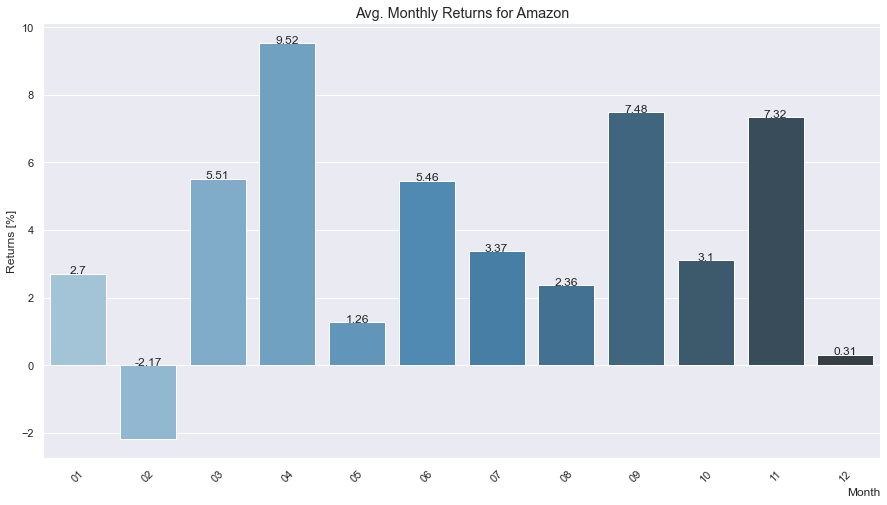

In [25]:
show_price_change_chart(price_change_per_month)

In [26]:
init_deposit = 1000
def get_returns_yearly(df, deposit):
    columns=['Year', 'Deposit']
    deposit_yearly = pd.DataFrame(columns=columns)
    for row in df.iterrows():
        year = row[0]
        price_change = row[1].values[0]
        deposit += deposit * (price_change/100)
        deposit_yearly = deposit_yearly.append(
                    pd.Series(
                        [
                            year,
                            int(deposit)
                        ],
                        index=columns
                    ),
                    ignore_index=True
                )
    deposit_yearly = deposit_yearly.set_index('Year')
    deposit_yearly.name = df.name # needs to be done after the above operations
    return deposit_yearly
    
deposit_yearly = get_returns_yearly(price_change_1y_data, init_deposit)

In [27]:
deposit_yearly

,Deposit
Year,
1997,2059
1998,22057
1999,30744
2000,5870
2001,4017
2002,6942
2003,19037
2004,15981
2005,16763


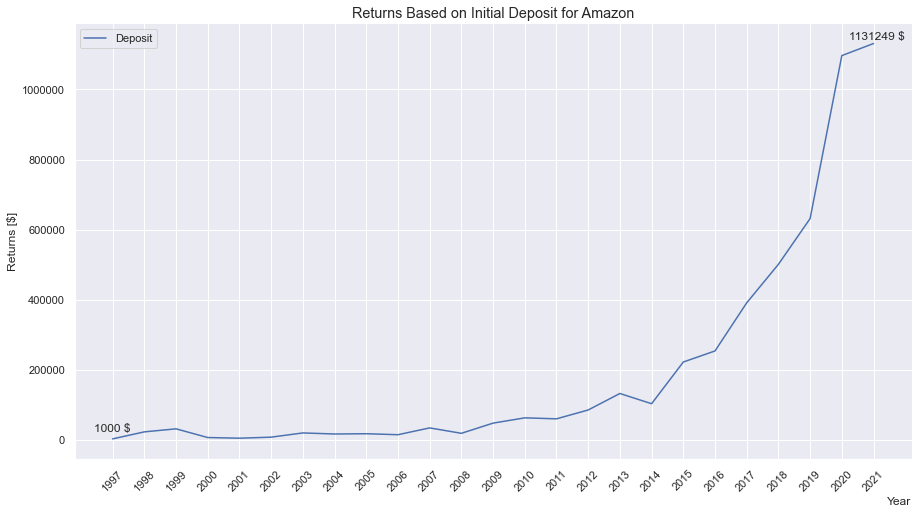

In [28]:
def show_returns_chart(df):
    plt.figure(figsize=(15, 8))
    plt.title(f'Returns Based on Initial Deposit for {df.name}', fontsize='large')
    sns.lineplot(data=df)
    plt.ticklabel_format(style='plain', axis='y') # disable scientific notation
    plt.ylabel('Returns [$]')
    plt.xlabel(df.index.name, loc='right')
    plt.xticks(rotation=45)
    plt.text(0, 
             init_deposit+df.Deposit[1], # to move text from the line
             str(init_deposit)+' $', 
             ha='center')
    plt.text(df.shape[0], 
             df.Deposit[-1]+(df.Deposit[-1]*0.01), 
             str(df.Deposit[-1])+' $', 
             ha='right')

show_returns_chart(deposit_yearly)

In [29]:
grouped_per_year = get_grouped_per_year(comp_1d_data)
grouped_per_year.count()

,high,low,open,close,volume,adjclose,close_pc,mm_dd
formatted_date,,,,,,,,
1997-12-31,160,160,160,160,160,160,160,160
1998-12-31,252,252,252,252,252,252,252,252
1999-12-31,252,252,252,252,252,252,252,252
2000-12-31,252,252,252,252,252,252,252,252
2001-12-31,248,248,248,248,248,248,248,248
2002-12-31,252,252,252,252,252,252,252,252
2003-12-31,252,252,252,252,252,252,252,252
2004-12-31,252,252,252,252,252,252,252,252
2005-12-31,252,252,252,252,252,252,252,252


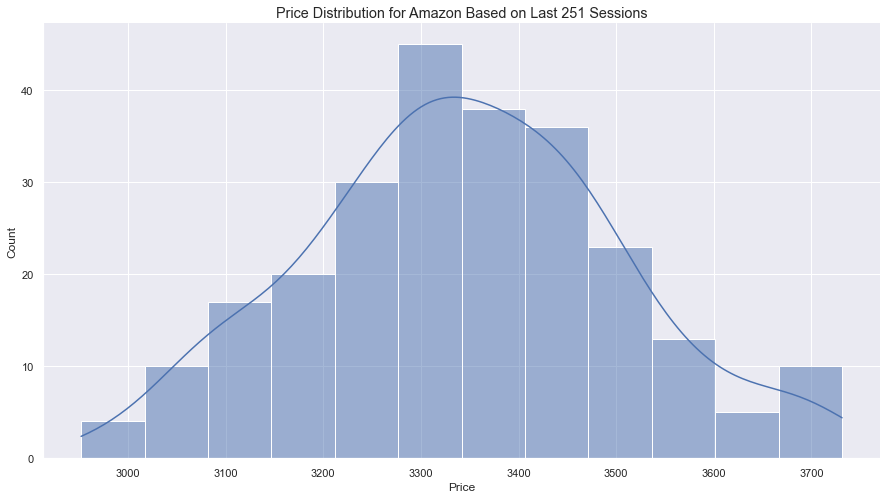

In [30]:
def show_price_dist(df, period):
    plt.figure(figsize=(15, 8))
    plt.title(f'Price Distribution for {df.name} Based on Last {period} Sessions', fontsize='large')
    sns.histplot(df['close'][-period:], kde=True)
    plt.xlabel('Price')

# last year period
lyp = grouped_per_year.count().iloc[-1][0]

show_price_dist(comp_1d_data, lyp)

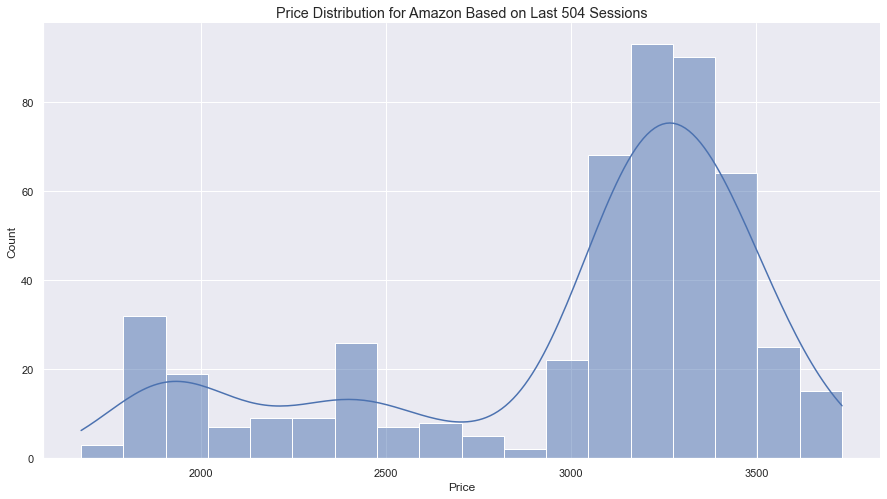

In [31]:
l2yp = grouped_per_year.count().iloc[-1][0] + grouped_per_year.count().iloc[-2][0]

show_price_dist(comp_1d_data, l2yp)

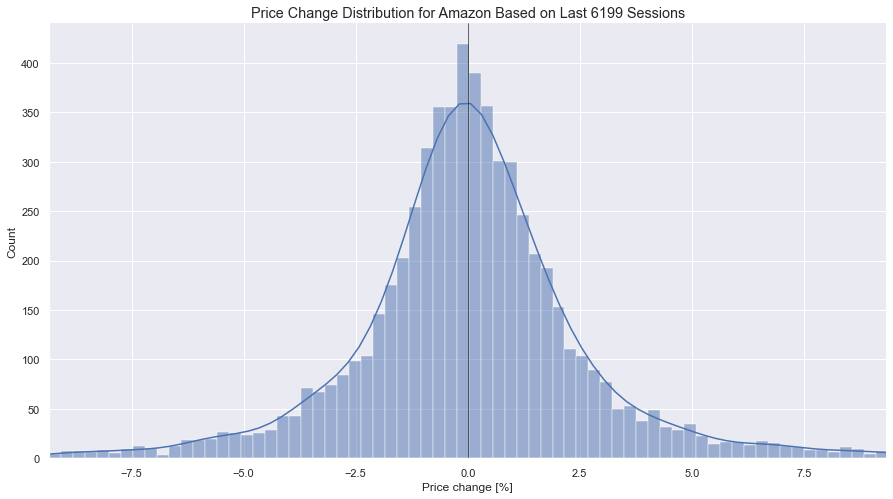

In [32]:
def show_price_change_dist(df, period):
    plt.figure(figsize=(15, 8))
    plt.title(f'Price Change Distribution for {df.name} Based on Last {period} Sessions', fontsize='large')
    sns.histplot(df['close_pc'][-period:], kde=True)
    plt.axvline(color='Black', linewidth=0.6)
    plt.xlabel('Price change [%]')
    plt.xlim(-(3*np.std(df['close_pc'][-period:])), 3*np.std(df['close_pc'][-period:]))

all_sessions = comp_1d_data.shape[0]
show_price_change_dist(comp_1d_data, all_sessions)

In [63]:
def get_up_and_down_candles(df):
    con_up_candles = []
    con_down_candles = []
    up = 0
    down = 0
    for pc in df.close_pc:
        if pc > 0:
            if up == 0 and down !=0:
                con_down_candles.append(down) 
            down = 0
            up += 1
        elif pc < 0:
            if down == 0 and up !=0:
                con_up_candles.append(up)
            up = 0
            down += 1
        else:
            if up > 0:
                con_up_candles.append(up)
            elif down > 0:
                con_down_candles.append(down)
            up, down = 0, 0
    return con_up_candles, con_down_candles

up_candles, down_candles = get_up_and_down_candles(comp_1d_data)

In [115]:
def show_candle_statistic(up_list, down_list):
    up_list = np.array(up_list)
    down_list = np.array(down_list)
    print(f'The average up quantity is {round(up_list.mean(), 2)}')
    print(f'The longest up series is {up_list.max()}')
    print(f'The shorter up series is {up_list.min()}')
    print(f'There is {up_list.sum()} up candles')
    get_candles_density(up_list)
    print('=========================================')
    print(f'The average down quantity is {round(down_list.mean(), 2)}')
    print(f'The longest down series is {down_list.max()}')
    print(f'The shorter down series is {down_list.min()}')
    print(f'There is {down_list.sum()} down candles')
    get_candles_density(down_list, 'down')

In [112]:
def get_candles_density(candle_list, candle_state='up'):
    hist, bins = np.histogram(candle_list, bins=list(set(candle_list)))
    for count, bin in zip(hist, bins):
        print(f'There is {count} continuous {bin} {candle_state} candles')
        # where are the last values with just 1 occupancy?

In [116]:
show_candle_statistic(up_candles, down_candles)

The average up quantity is 1.98
The longest up series is 14
The shorter up series is 1
There is 3099 up candles
There is 810 continuous 1 up candles
There is 376 continuous 2 up candles
There is 192 continuous 3 up candles
There is 86 continuous 4 up candles
There is 48 continuous 5 up candles
There is 27 continuous 6 up candles
There is 12 continuous 7 up candles
There is 5 continuous 8 up candles
There is 4 continuous 9 up candles
There is 3 continuous 10 up candles
There is 2 continuous 11 up candles
The average down quantity is 1.96
The longest down series is 9
The shorter down series is 1
There is 3063 down candles
There is 760 continuous 1 down candles
There is 410 continuous 2 down candles
There is 216 continuous 3 down candles
There is 102 continuous 4 down candles
There is 48 continuous 5 down candles
There is 16 continuous 6 down candles
There is 7 continuous 7 down candles
There is 5 continuous 8 down candles


In [98]:
up_hist, bin_edges = np.histogram(up_candles, bins=list(set(up_candles)))

In [99]:
bin_edges

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14])

In [105]:
up_hist

array([810, 376, 192,  86,  48,  27,  12,   5,   4,   3,   2], dtype=int64)

<AxesSubplot:>

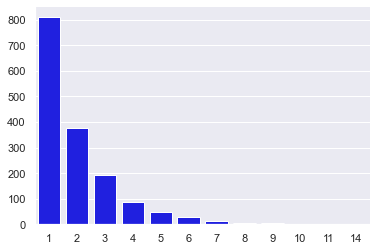

In [110]:
sns.barplot(x=bins, y=np.append(up_hist, 1), color='blue')